In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn.model_selection import *
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

In [2]:
car_data = pd.read_csv('Downloads/train.csv')
car_data = car_data.drop('VehicleID', axis=1)
car_data

,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.20,Nigerian Used,NaN
1,Ibadan,Hyundai,Sonata,"2,012",Silver,3.50,Nigerian Used,"125,000"
2,Lagos,Lexus,RX 350,"2,010",Red,9.20,Foreign Used,"110,852"
3,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.80,Foreign Used,"30,000"
4,Ibadan,Toyota,Highlander,"2,002",Red,2.60,Nigerian Used,"125,206"
...,...,...,...,...,...,...,...,...
7200,Abuja,Honda,Civic,"2,018",Gray,5.70,Foreign Used,"65,000"
7201,Abuja,BMW,X3,"2,007",White,4.00,Nigerian Used,"200,000"
7202,Abuja,Toyota,RAV4 2.5 Limited 4x4,"2,010",Black,2.85,Nigerian Used,NaN
7203,Lagos,Mercedes-Benz,GLK-Class 350,"2,012",Black,8.65,Foreign Used,"85,750"


In [3]:
car_data.isna().sum()

Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)      17
Type                       197
Distance                  2360
dtype: int64

In [4]:
car_data.isna().mean().round(4) * 100

Location                   0.00
Maker                      0.00
Model                      0.00
Year                       0.29
Colour                     0.00
Amount (Million Naira)     0.24
Type                       2.73
Distance                  32.76
dtype: float64

### We can see we have alot of missing values in the Distance, type, amount, and year features

In [5]:
 #Removing Distance variable since majority of their data is missing
car_data = car_data.drop('Distance', axis=1)


In [6]:
# filling in the missing values with the mean
car_data.fillna(car_data.mean())

/var/folders/wb/ylp2wb51397cgbs8cn3qck3c0000gn/T/ipykernel_72873/2136048549.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  car_data.fillna(car_data.mean())


,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type
0,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.20,Nigerian Used
1,Ibadan,Hyundai,Sonata,"2,012",Silver,3.50,Nigerian Used
2,Lagos,Lexus,RX 350,"2,010",Red,9.20,Foreign Used
3,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.80,Foreign Used
4,Ibadan,Toyota,Highlander,"2,002",Red,2.60,Nigerian Used
...,...,...,...,...,...,...,...
7200,Abuja,Honda,Civic,"2,018",Gray,5.70,Foreign Used
7201,Abuja,BMW,X3,"2,007",White,4.00,Nigerian Used
7202,Abuja,Toyota,RAV4 2.5 Limited 4x4,"2,010",Black,2.85,Nigerian Used
7203,Lagos,Mercedes-Benz,GLK-Class 350,"2,012",Black,8.65,Foreign Used


In [7]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                7205 non-null   object 
 1   Maker                   7205 non-null   object 
 2   Model                   7205 non-null   object 
 3   Year                    7184 non-null   object 
 4   Colour                  7205 non-null   object 
 5   Amount (Million Naira)  7188 non-null   float64
 6   Type                    7008 non-null   object 
dtypes: float64(1), object(6)
memory usage: 394.1+ KB


In [8]:
car_data.isna().sum()

Location                    0
Maker                       0
Model                       0
Year                       21
Colour                      0
Amount (Million Naira)     17
Type                      197
dtype: int64

In [9]:
# replacing the missing cat_columns with their mode
most_frequent_value = car_data['Type'].mode()[0]
car_data['Type'] = car_data['Type'].fillna(most_frequent_value)

most_frequent_value = car_data['Year'].mode()[0]
car_data['Year'] = car_data['Year'].fillna(most_frequent_value)

car_data = car_data.fillna(car_data.mean())

/var/folders/wb/ylp2wb51397cgbs8cn3qck3c0000gn/T/ipykernel_72873/4127982890.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  car_data = car_data.fillna(car_data.mean())


In [10]:
car_data.isna().sum()

Location                  0
Maker                     0
Model                     0
Year                      0
Colour                    0
Amount (Million Naira)    0
Type                      0
dtype: int64

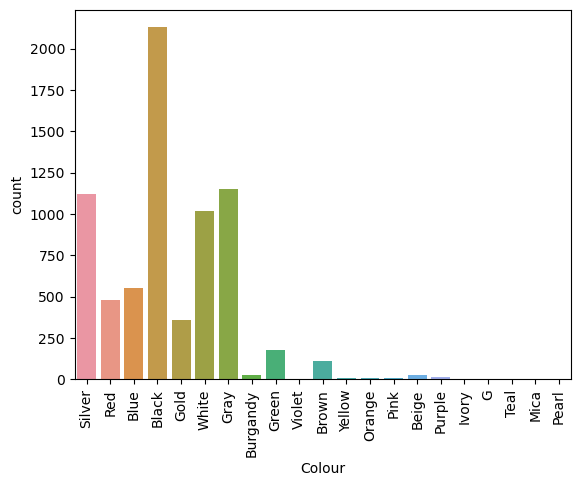

In [11]:
sns.countplot(data=car_data, x='Colour')
plt.xticks(rotation=90)
plt.show()


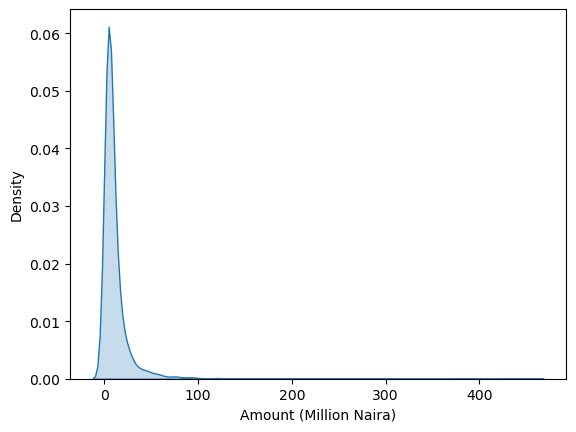

In [12]:
# seeing the amount distribution 
sns.kdeplot(data=car_data, x='Amount (Million Naira)', fill=True)
plt.show()

In [13]:
# Cpnverting the cat_columns to numerical columns
car_data = pd.get_dummies(car_data, drop_first=True)
car_data.head()

,Amount (Million Naira),Location_Ibadan,Location_Lagos,Maker_Audi,Maker_BAW,Maker_BMW,Maker_Bentley,Maker_Brabus,Maker_Buick,Maker_Cadillac,...,Colour_Pink,Colour_Purple,Colour_Red,Colour_Silver,Colour_Teal,Colour_Violet,Colour_White,Colour_Yellow,Type_Foreign Used,Type_Nigerian Used
0,2.2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,3.5,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,9.2,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,22.8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2.6,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [14]:
print(car_data.columns)

Index(['Amount (Million Naira)', 'Location_Ibadan', 'Location_Lagos',
       'Maker_Audi', 'Maker_BAW', 'Maker_BMW', 'Maker_Bentley', 'Maker_Brabus',
       'Maker_Buick', 'Maker_Cadillac',
       ...
       'Colour_Pink', 'Colour_Purple', 'Colour_Red', 'Colour_Silver',
       'Colour_Teal', 'Colour_Violet', 'Colour_White', 'Colour_Yellow',
       'Type_Foreign Used', 'Type_Nigerian Used'],
      dtype='object', length=1333)


In [15]:
X = car_data.drop(['Amount (Million Naira)'], axis=1)
y = car_data['Amount (Million Naira)']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [17]:
random = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)
cat = CatBoostRegressor(learning_rate =0.1, max_depth =10, verbose=0)
Lin_reg = LinearRegression(positive=True, n_jobs=1)


random.fit(X_train, y_train)
random_pred = random.predict(X_test)
random_r2 = r2_score(y_test, random_pred)
print('Random Forest:',random_r2)

cat.fit(X_train, y_train)
cat_pred = cat.predict(X_test)
cat_r2 = r2_score(y_test, cat_pred)
print('CatBoostRegressor:',cat_r2)

Lin_reg.fit(X_train, y_train)
Lin_pred = Lin_reg.predict(X_test)
Lin_r2 = r2_score(y_test, Lin_pred)
print('Linear regression:', Lin_r2)

Random Forest: 0.7529911400287363
CatBoostRegressor: 0.8650201498912694
Linear regression: 0.6875353815788714


In [18]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, cat_pred)

95.29380360945159

### CatBoostRegressor is the most effective model on this dataset with r2 score of ~0.87

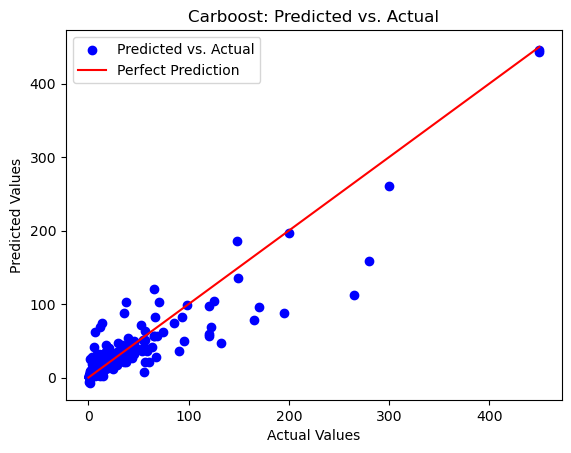

In [19]:
plt.scatter(y_test, cat_pred, color='b', label='Predicted vs. Actual')

max_value = max(np.max(y_test), np.max(cat_pred))
plt.plot([0, max_value], [0, max_value], color='r', label='Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Carboost: Predicted vs. Actual')

plt.legend()

plt.show()